# Cluster analysis of original input

This notebook contains cluster analysis of the latent representation of S2 tensor set. It an access to a GPU. 

The NVIDIA Docker container RAPIDS 21.02 was used to generate a computational environment. Addionally, we have install `clustergram`, `bokeh` and `geopandas` packages into the environment.

In [ ]:
import cudf
from clustergram import Clustergram
from cuml import KMeans

import geopandas as gpd

Read the latent representation.

In [ ]:
df = cudf.read_csv("sentinel_gb_encoder_map_3_20210317.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-0.770423,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.209290,-0.321692,0.548549,0.485296,...,-1.021918,-1.021918,0.312756,1.536978,0.218558,1.227125,0.825640,-0.230331,1.247084,0.786748
1,-0.773144,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.160405,-0.501296,0.824810,0.892124,...,-1.021918,-1.021918,0.607112,1.926771,0.297264,1.062941,0.786516,-0.025921,1.375679,0.730609
2,-0.926168,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,-0.022039,-0.533284,0.635048,0.234796,...,-1.021918,-1.021918,0.440355,1.516804,0.349505,1.371240,1.149325,-0.088894,1.258555,0.741133
3,-0.633441,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.196094,-0.410912,0.410041,0.913552,...,-1.021918,-1.021918,0.597386,1.843557,0.271835,1.070774,1.090807,0.048968,1.312228,0.679815
4,-0.727528,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,0.127821,-0.487408,0.911615,-0.013138,...,-1.021918,-1.021918,0.386493,1.366569,0.601878,1.196588,1.020872,-0.231475,1.229797,0.738646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710710,-0.566200,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.193087,0.183391,0.586106,0.618853,...,-1.021918,-1.021918,0.791859,2.045599,0.347751,1.565551,1.329648,-0.137052,1.720185,1.049834
1710711,-0.519064,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.303980,0.147313,0.250400,1.074005,...,-1.021918,-1.021918,0.453095,1.996625,0.867215,2.252919,1.640205,0.112090,1.868744,1.320377
1710712,-0.533066,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.019940,0.225325,-0.064241,1.567293,...,-1.021918,-1.021918,0.669177,2.436414,0.492457,1.875219,1.644542,-0.434694,1.741383,1.052425
1710713,-0.531211,-1.021918,-1.021918,-1.021918,-1.021918,-1.021918,1.241982,0.161816,0.193414,1.317974,...,-1.021918,-1.021918,0.871555,1.965400,0.634084,1.560746,1.463502,-0.086772,1.471801,0.851783


Generate clustergram.

In [ ]:
cgram = Clustergram(range(1, 20), backend="cuML", random_state=42, n_init=100)
cgram.fit(df)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 182.1709451675415 seconds.
K=3 fitted in 187.62641859054565 seconds.
K=4 fitted in 268.871294260025 seconds.
K=5 fitted in 314.49781799316406 seconds.
K=6 fitted in 334.93639755249023 seconds.
K=7 fitted in 368.8547592163086 seconds.
K=8 fitted in 457.2713408470154 seconds.
K=9 fitted in 465.72610211372375 seconds.
K=10 fitted in 479.27005195617676 seconds.
K=11 fitted in 531.7187461853027 seconds.
K=12 fitted in 565.3928415775299 seconds.
K=13 fitted in 632.9387700557709 seconds.
K=14 fitted in 712.9940123558044 seconds.
K=15 fitted in 694.4447827339172 seconds.
K=16 fitted in 725.7097082138062 seconds.
K=17 fitted in 749.6763203144073 seconds.
K=18 fitted in 811.7067050933838 seconds.
K=19 fitted in 870.5993194580078 seconds.


In [ ]:
labels = cgram.labels
labels

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,1,0,2,1,0,4,4,3,1,10,7,7,6,6,8,4,3,11
1,0,1,0,2,1,0,4,4,3,5,1,3,6,7,3,14,3,3,10
2,0,1,0,2,1,0,4,4,3,1,1,3,7,6,6,8,4,3,11
3,0,1,0,0,3,2,3,1,8,2,6,10,7,8,13,15,1,4,12
4,0,1,0,2,1,0,4,4,8,1,10,7,7,6,6,8,4,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710710,0,0,1,3,2,5,5,0,2,9,8,11,8,2,4,6,9,6,1
1710711,0,0,1,3,2,4,6,5,1,7,9,2,1,11,2,12,2,15,5
1710712,0,0,1,3,2,4,6,5,1,7,9,2,1,11,2,12,2,15,5
1710713,0,0,1,3,2,4,1,2,1,0,2,4,10,12,4,9,13,10,17


In [ ]:
labels.to_csv("sentinel_gb_encoder_map_3_20210317_clustergram_labels.csv")

CPU times: user 1.19 s, sys: 155 ms, total: 1.35 s
Wall time: 1.34 s


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

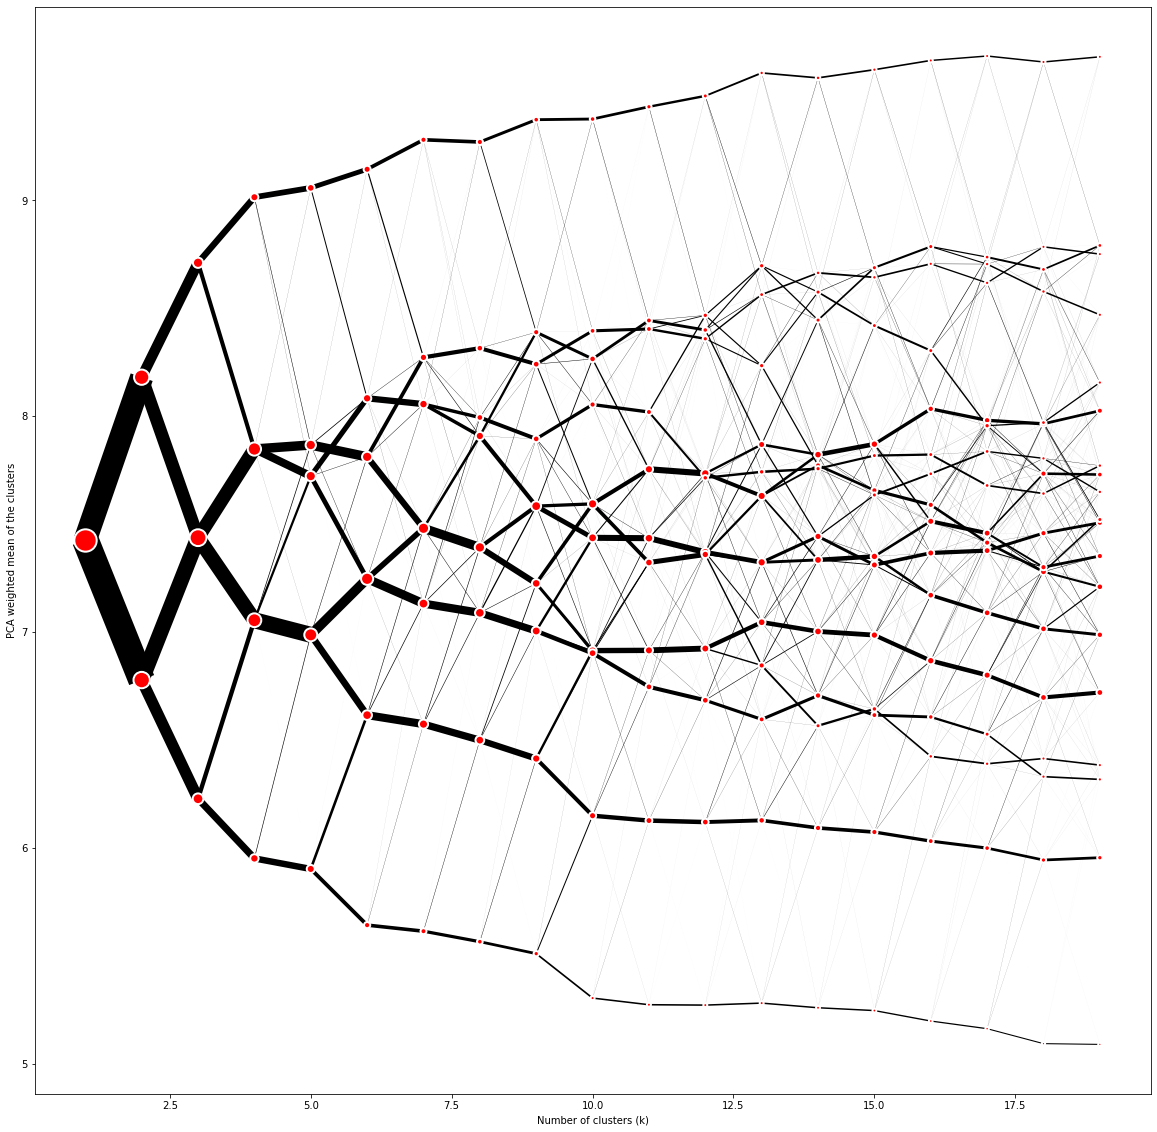

In [ ]:
%%time
cgram.plot(figsize=(20, 20), pca_weighted=True)

CPU times: user 928 ms, sys: 188 ms, total: 1.12 s
Wall time: 1.11 s


<AxesSubplot:xlabel='Number of clusters (k)', ylabel='Mean of the clusters'>

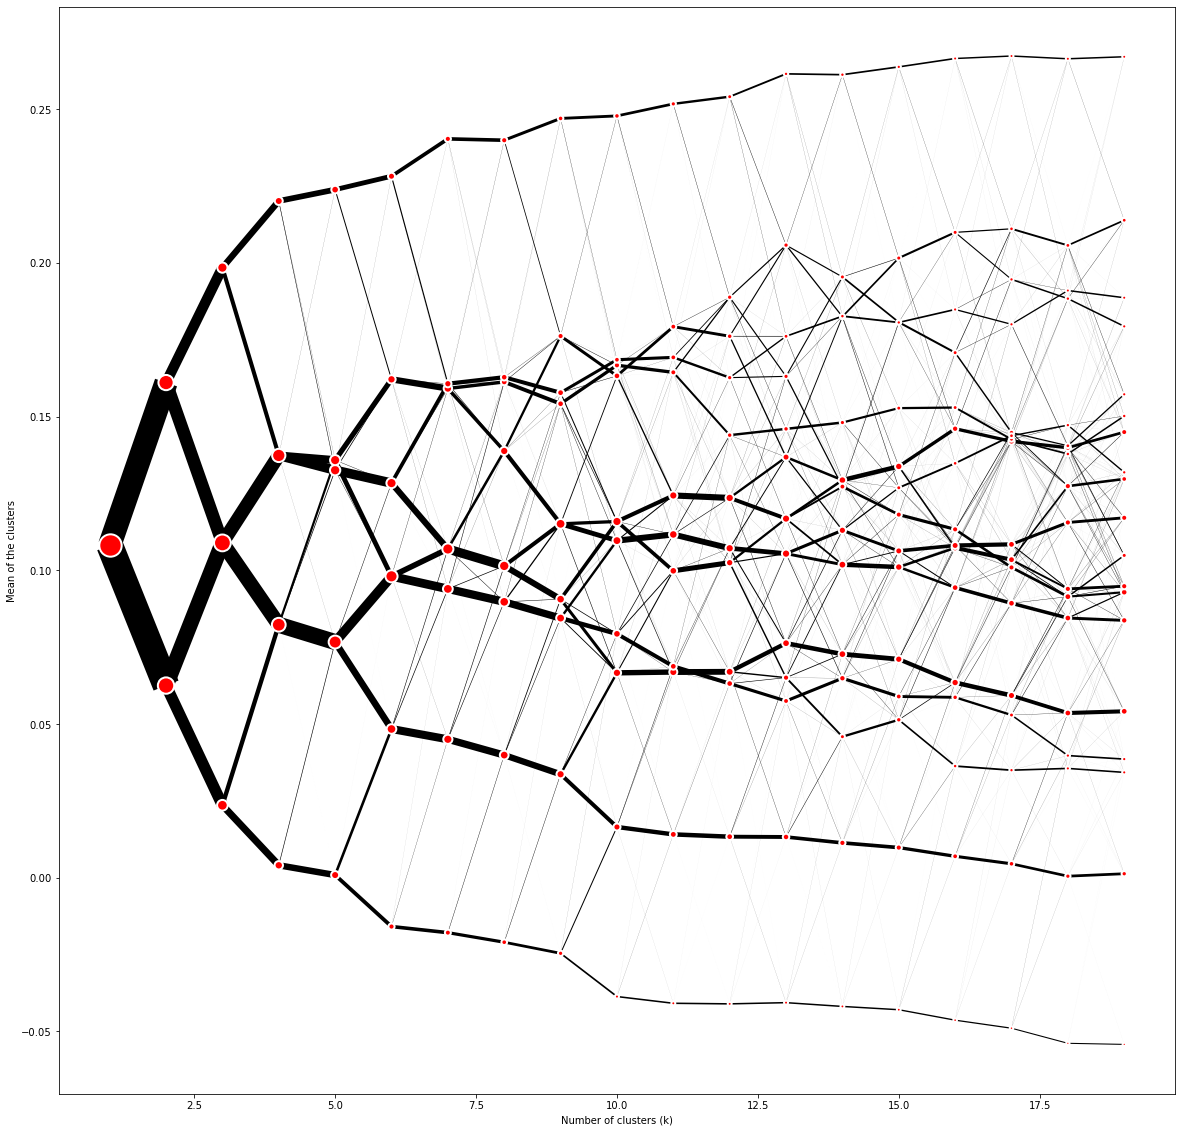

In [ ]:
%%time
cgram.plot(figsize=(20, 20), pca_weighted=False)

Load Bokeh to explore clustergram interactively

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [ ]:
fig = cgram.bokeh(figsize=(1000, 800))
show(fig)

In [ ]:
fig = cgram.bokeh(figsize=(1000, 800), pca_weighted=False)
show(fig)

## Final clustering

Do the final clustering using 7 classes.

In [ ]:
km = KMeans(n_clusters=7, n_init=1000, random_state=42, verbose=1)
km.fit(df)

KMeans()

In [ ]:
km.labels_

0          2
1          2
2          2
3          6
4          2
          ..
1710710    5
1710711    3
1710712    3
1710713    3
1710714    3
Length: 1710715, dtype: int32

`postcode_geom_osgb.pq` contains a list of postcodes aligned with our output. We use it to save postcode-label pairs.

In [ ]:
geom = gpd.read_parquet('postcode_geom_osgb.pq')

In [ ]:
geom

,PCDS,UTM_ZONE,UTM_X,UTM_Y,geometry
0,AB10 1AB,30,554639.18,6334401.32,POINT (394235.441 806530.784)
1,AB10 1AF,30,554586.65,6334300.54,POINT (394181.440 806430.784)
2,AB10 1AG,30,554634.67,6334339.47,POINT (394230.026 806469.006)
3,AB10 1AH,30,554777.68,6334233.27,POINT (394371.467 806360.721)
4,AB10 1AL,30,554699.01,6334452.44,POINT (394296.014 806581.022)
...,...,...,...,...,...
1710710,ZE3 9JU,30,594727.85,6640320.72,POINT (438872.230 1111806.351)
1710711,ZE3 9JW,30,594857.56,6638553.33,POINT (438975.215 1110037.332)
1710712,ZE3 9JX,30,594751.87,6638732.79,POINT (438872.255 1110218.355)
1710713,ZE3 9JY,30,594350.53,6640537.04,POINT (438498.246 1112028.331)


In [ ]:
lab = cudf.DataFrame(km.labels_)
lab["PCDS"] = geom.PCDS.values

,0,PCDS
0,0,AB10 1AB
1,0,AB10 1AF
2,2,AB10 1AG
3,2,AB10 1AH
4,0,AB10 1AL
...,...,...
1710710,4,ZE3 9JU
1710711,3,ZE3 9JW
1710712,3,ZE3 9JX
1710713,4,ZE3 9JY


In [ ]:
lab.to_csv("sentinel_gb_encoder_map_3_20210317_1k_labels.csv")